In [91]:
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
Data = pd.read_excel(r"C:\Users\kadas\Desktop\These_CIFRE\RQR\Data\Base.xlsx")
Data.head(5)

,StartDate,EndDate,Progress,Duration (in seconds),Finished,100PTS_1,100PTS_2,100PTS_3,100PTS_5,SD ATTRACTIVITE_1,...,QUALITE GLOBALE_3,Genre,Profession,Expérience,Poids - Commerces_1,Poids Bureaux_1,Poids résidentiel_1,Densité périurbain_1,Densité centre-métro_1,Densité ville moy_1
0,Date de commencement,Date de fin,Progrès,Durée (en secondes),Terminé,Supposez que vous deviez évaluer la qualité gl...,Supposez que vous deviez évaluer la qualité gl...,Supposez que vous deviez évaluer la qualité gl...,Supposez que vous deviez évaluer la qualité gl...,"Pour expliquer l'attractivité du quartier, c'e...",...,"Enfin, pour évaluer la QUALITE REELLE GLOBALE ...",Êtes-vous :,Avez-vous une expertise professionnelle dans l...,"Quelle est, en nombre d'années, votre degré d'...",Quartier idéal noté à 1000/1000\n\t\t\tQuartie...,Quartier idéal noté à 1000/1000\n\t\t\tQuartie...,Quartier idéal noté à 1000/1000\n\t\t\tQuartie...,Densité bâtie \n\n\t\t\tquartier idéal noté à ...,Densité bâtie \n\n\t\t\tquartier idéal noté à ...,Densité bâtie \n\n\t\t\tquartier idéal noté à ...
1,2024-08-23 14:15:11,2024-08-23 14:30:23,100,912,1,20,30,20,30,25,...,35,1,2,4,850,900,925,850,900,800
2,2024-09-12 11:24:32,2024-09-12 12:06:08,100,2495,1,35,15,40,10,25,...,25,1,2,4,750,750,850,748,901,748
3,2024-09-27 09:02:13,2024-09-27 12:04:31,100,10937,1,50,10,20,20,30,...,30,1,4,1,954,703,703,900,703,850
4,2024-09-29 13:51:54,2024-10-01 16:44:30,100,183156,1,40,20,25,15,35,...,30,1,1,2,721,850,747,850,720,955


## 3) Dictionnaire de renommage 

In [94]:
rename_map = {
    # --- pondération des acteurs (100PTS_*)
    "100PTS_1": "POIDS_Amenageurs_urbanistes",
    "100PTS_2": "POIDS_Promoteurs_investisseurs_conseils",
    "100PTS_3": "POIDS_Services_municipaux",
    "100PTS_5": "POIDS_Particuliers_hors_quartier",

    # --- attractivité
    "SD ATTRACTIVITE_1": "ATTR_Esthetique",
    "SD ATTRACTIVITE_2": "ATTR_Offre_commerciale",
    "SD ATTRACTIVITE_3": "ATTR_Offre_services",
    "SD ATTRACTIVITE_4": "ATTR_Offre_loisirs",
    "SD ATTRACTIVITE_5": "ATTR_Reputation",

    # --- sociabilités
    "SD SOCIABILITES_1": "SOC_Exterieur",
    "SD SOCIABILITES_2": "SOC_Commerciale",
    "SD SOCIABILITES_3": "SOC_Mixite_logements",
    "SD SOCIABILITES_4": "SOC_Connectee",

    # --- fluidité
    "SD FLUIDITE_1": "FLU_Structuration_rues",
    "SD FLUIDITE_2": "FLU_Intermodalite",
    "SD FLUIDITE_3": "FLU_Deambulation_pietons_PMR",
    "SD FLUIDITE_4": "FLU_Mobilites_douces",
    "SD FLUIDITE_5": "FLU_Vehicules_motorises",

    # --- salubrité
    "SD SALUBRITE_1": "SAL_Proprete",
    "SD SALUBRITE_2": "SAL_Calme",
    "SD SALUBRITE_3": "SAL_Nature",
    "SD SALUBRITE_4": "SAL_Securite",

    # --- pondération blocs qualité de vie
    "D QUALITE DE VIE_1": "QLT_VIE_Attractivite",
    "D QUALITE DE VIE_2": "QLT_VIE_Sociabilites",
    "D QUALITE DE VIE_3": "QLT_VIE_Fluidite",
    "D QUALITE DE VIE_4": "QLT_VIE_Salubrite",

    # --- environnement : urbanisme
    "SD URBANISME_1": "QLT_URB_Taille_humaine",
    "SD URBANISME_2": "QLT_URB_Compacite_multifonctionnelle",
    "SD URBANISME_3": "QLT_URB_Coherence",
    "SD URBANISME_4": "QLT_URB_Mobilier_urbain",

    # --- durabilité : Capacité a favoriser le developpement durable 
    "SD DURABILITE_1": "CFDD_Vegetalisation",
    "SD DURABILITE_2": "CFDD_Absence_pollutions",
    "SD DURABILITE_3": "CFDD_Energies_durables",
    "SD DURABILITE_4": "CFDD_Gestion_durable_intelligente",
    "SD DURABILITE_5": "CFDD_Ecosystemes_naturels",

    # --- pérennité : capacité du quartier à supporter  le passage du temps
    "SD PERENNITE_1": "PER_Capacite_evoluer",
    "SD PERENNITE_2": "PER_Sante_batiments_voirie",
    "SD PERENNITE_3": "PER_Stabilite_economique",

    # --- risques : Dégré d'exposition au risque 
    "SD GESTION RISQUES_1": "DER_Exploitation_fonctionnement",
    "SD GESTION RISQUES_2": "DER_Technologiques",
    "SD GESTION RISQUES_3": "DER_Naturels",

    # --- pondération blocs environnement : Qualité de l'environnement  urbain et naturel du quartier
    "D ENVIRONNEMENT_1": "QLT_ENV_STR_URBAINE",
    "D ENVIRONNEMENT_2": "QLT_ENV_DD",
    "D ENVIRONNEMENT_3": "QLT_ENV_Perennite",
    "D ENVIRONNEMENT_4": "QLT_ENV_EXPORISK",

    # --- localisation  : capacité  du quartier  à etre connecter à l'ensemble urbain et regional
    "SD CONNEXION_1": "LOC_Transport_Commun",
    "SD CONNEXION_2": "LOC_Transports_longue_distance",
    "SD CONNEXION_3": "LOC_Connexion_routiere",
    
    # Rang du quartier
    
    "SD RANG_1": "HRCHIE_INT_Quartier",
    "SD RANG_3": "HRCHIE_Agglomeration",

    # --- pondération blocs localisation : Qualité de localisation du quartier
    "D LOCALISATION_1": "QLQ_Connexion_Aglomeration",
    "D LOCALISATION_2": "QLQ_Rang_Aglomeration",

    # --- pondération globale (3 dimensions) : Qualité reel globale
    "QUALITE GLOBALE_1": "GLOB_Qualite_vie_Quartier",
    "QUALITE GLOBALE_2": "GLOB_Env_urbain_naturel_Quartier",
    "QUALITE GLOBALE_3": "GLOB_Localisation_Quartier",

    # --- profil
    "Genre": "PROFIL_Genre",
    "Profession": "PROFIL_Profession",
    "Expérience": "PROFIL_Experience_annees",

    # --- scénarios (1000)
    "Poids - Commerces_1": "SCORE_CAS1_Quartier_commerces",
    "Poids Bureaux_1": "SCORE_CAS2_Quartier_bureaux",
    "Poids résidentiel_1": "SCORE_CAS3_Quartier_residentiel",

    "Densité périurbain_1": "SCORE_DENS_Qpériurbain_mtpole_taille_moy",
    "Densité centre-métro_1": "SCORE_DENS_Q_central_grande_mtpole",
    "Densité ville moy_1": "SCORE_DENS_Qville_moy_peu_dynq",
}

df = Data.rename(columns=rename_map)

In [95]:
df.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'POIDS_Amenageurs_urbanistes',
       'POIDS_Promoteurs_investisseurs_conseils', 'POIDS_Services_municipaux',
       'POIDS_Particuliers_hors_quartier', 'ATTR_Esthetique',
       'ATTR_Offre_commerciale', 'ATTR_Offre_services', 'ATTR_Offre_loisirs',
       'ATTR_Reputation', 'SOC_Exterieur', 'SOC_Commerciale',
       'SOC_Mixite_logements', 'SOC_Connectee', 'FLU_Structuration_rues',
       'FLU_Intermodalite', 'FLU_Deambulation_pietons_PMR',
       'FLU_Mobilites_douces', 'FLU_Vehicules_motorises', 'SAL_Proprete',
       'SAL_Calme', 'SAL_Nature', 'SAL_Securite', 'QLT_VIE_Attractivite',
       'QLT_VIE_Sociabilites', 'QLT_VIE_Fluidite', 'QLT_VIE_Salubrite',
       'QLT_URB_Taille_humaine', 'QLT_URB_Compacite_multifonctionnelle',
       'QLT_URB_Coherence', 'QLT_URB_Mobilier_urbain', 'CFDD_Vegetalisation',
       'CFDD_Absence_pollutions', 'CFDD_Energies_durables',
       'CFDD_Gestion_durable_intelli

In [96]:
df.columns
df.to_excel("donnees_col_rename.xlsx", index=False)

# 4) Réordonner les colonnes par blocs

In [97]:
ordered = [
    # acteurs
    "POIDS_Amenageurs_urbanistes",
    "POIDS_Promoteurs_investisseurs_conseils",
    "POIDS_Services_municipaux",
    "POIDS_Particuliers_hors_quartier",
    
    # QUALITES

    # 1) qualité de vie - sous dimensions
    "ATTR_Esthetique","ATTR_Offre_commerciale","ATTR_Offre_services","ATTR_Offre_loisirs","ATTR_Reputation",
    "SOC_Exterieur","SOC_Commerciale","SOC_Mixite_logements","SOC_Connectee",
    "FLU_Structuration_rues","FLU_Intermodalite","FLU_Deambulation_pietons_PMR","FLU_Mobilites_douces","FLU_Vehicules_motorises",
    "SAL_Proprete","SAL_Calme","SAL_Nature","SAL_Securite",

    #  pondération blocs QV
    "QLT_VIE_Attractivite","QLT_VIE_Sociabilites","QLT_VIE_Fluidite","QLT_VIE_Salubrite",

    # 2) environnement - sous dimensions
    "QLT_URB_Taille_humaine","QLT_URB_Compacite_multifonctionnelle","QLT_URB_Coherence","QLT_URB_Mobilier_urbain",
    "CFDD_Vegetalisation","CFDD_Absence_pollutions","CFDD_Energies_durables","CFDD_Gestion_durable_intelligente","CFDD_Ecosystemes_naturels",
    "PER_Capacite_evoluer","PER_Sante_batiments_voirie","PER_Stabilite_economique",
    "DER_Exploitation_fonctionnement","DER_Technologiques","DER_Naturels",


    #  pondération blocs environnement
    "QLT_ENV_STR_URBAINE","QLT_ENV_DD","QLT_ENV_Perennite","QLT_ENV_EXPORISK",

    # # 3) localisation
    "LOC_Transport_Commun","LOC_Transports_longue_distance","LOC_Connexion_routiere",
    "HRCHIE_INT_Quartier","HRCHIE_Agglomeration",
    "QLQ_Connexion_Aglomeration","QLQ_Rang_Aglomeration",

    # # Ponderation globale 
    "GLOB_Qualite_vie_Quartier","GLOB_Env_urbain_naturel_Quartier","GLOB_Localisation_Quartier",
 
    # # 4) scénarios 1000
    "SCORE_CAS1_Quartier_commerces","SCORE_CAS2_Quartier_bureaux","SCORE_CAS3_Quartier_residentiel",
    "SCORE_DENS_Qpériurbain_mtpole_taille_moy","SCORE_DENS_Q_central_grande_mtpole","SCORE_DENS_Qville_moy_peu_dynq",

    # profil
    "PROFIL_Genre","PROFIL_Profession","PROFIL_Experience_annees",
]
 
ordered = [c for c in ordered if c in df.columns]
rest = [c for c in df.columns if c not in ordered]

In [98]:
df = df[ordered + rest]

In [99]:
df.columns

Index(['POIDS_Amenageurs_urbanistes',
       'POIDS_Promoteurs_investisseurs_conseils', 'POIDS_Services_municipaux',
       'POIDS_Particuliers_hors_quartier', 'ATTR_Esthetique',
       'ATTR_Offre_commerciale', 'ATTR_Offre_services', 'ATTR_Offre_loisirs',
       'ATTR_Reputation', 'SOC_Exterieur', 'SOC_Commerciale',
       'SOC_Mixite_logements', 'SOC_Connectee', 'FLU_Structuration_rues',
       'FLU_Intermodalite', 'FLU_Deambulation_pietons_PMR',
       'FLU_Mobilites_douces', 'FLU_Vehicules_motorises', 'SAL_Proprete',
       'SAL_Calme', 'SAL_Nature', 'SAL_Securite', 'QLT_VIE_Attractivite',
       'QLT_VIE_Sociabilites', 'QLT_VIE_Fluidite', 'QLT_VIE_Salubrite',
       'QLT_URB_Taille_humaine', 'QLT_URB_Compacite_multifonctionnelle',
       'QLT_URB_Coherence', 'QLT_URB_Mobilier_urbain', 'CFDD_Vegetalisation',
       'CFDD_Absence_pollutions', 'CFDD_Energies_durables',
       'CFDD_Gestion_durable_intelligente', 'CFDD_Ecosystemes_naturels',
       'PER_Capacite_evoluer', 'PER_Sante_b

In [100]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   POIDS_Amenageurs_urbanistes               33 non-null     object
 1   POIDS_Promoteurs_investisseurs_conseils   33 non-null     object
 2   POIDS_Services_municipaux                 33 non-null     object
 3   POIDS_Particuliers_hors_quartier          33 non-null     object
 4   ATTR_Esthetique                           32 non-null     object
 5   ATTR_Offre_commerciale                    32 non-null     object
 6   ATTR_Offre_services                       32 non-null     object
 7   ATTR_Offre_loisirs                        32 non-null     object
 8   ATTR_Reputation                           32 non-null     object
 9   SOC_Exterieur                             32 non-null     object
 10  SOC_Commerciale                           32 non-null     objec

In [101]:
df['PROFIL_Genre'].unique()
df['PROFIL_Profession'].unique()

array(['Avez-vous une expertise professionnelle dans le champ immobilier ou urbain, si oui laquelle ?',
       2, 4, 1, nan], dtype=object)

# 5)  Renommage des modalités

In [102]:
df = df.drop(index=0)
df = df.reset_index(drop=True)

In [103]:
print(df['PROFIL_Genre'].unique()) 
print(df['PROFIL_Profession'].unique()) 
print(df['PROFIL_Experience_annees'].unique())

[1 2 nan]
[2 4 1 nan]
[4 1 2 3 nan]


In [104]:
profession_map = {
    1: "Aménageur / urbaniste",
    2: "Promoteur / investisseur / conseil immobilier",
    3: "Municipalité / services municipaux",
    4: "Particulier sans expertise professionnelle"
}
df['PROFIL_Profession_label'] = df['PROFIL_Profession'].map(profession_map)
df['PROFIL_Profession_label'].value_counts(dropna=False)

PROFIL_Profession_label
Particulier sans expertise professionnelle       14
Promoteur / investisseur / conseil immobilier    12
Aménageur / urbaniste                             5
NaN                                               5
Name: count, dtype: int64

In [105]:
experience_map = {
    1: "Pas d'expertise professionnelle",
    2: "Moins de 10 ans d'expertise",
    3: "De 10 à 20 ans d'expertise",
    4: "Plus de 20 ans d'expertise"
}
df['PROFIL_Experience_label'] = df['PROFIL_Experience_annees'].map(experience_map)
df['PROFIL_Experience_label'].value_counts(dropna=False)

PROFIL_Experience_label
Pas d'expertise professionnelle    12
Moins de 10 ans d'expertise        10
Plus de 20 ans d'expertise          5
NaN                                 5
De 10 à 20 ans d'expertise          4
Name: count, dtype: int64

In [106]:
genre_map = {
    1: "Homme",
    2: "Femme",
    3: "Autre"
}
df['PROFIL_Genre_label'] = df['PROFIL_Genre'].map(genre_map)
df['PROFIL_Genre_label'].value_counts(dropna=False)

PROFIL_Genre_label
Homme    23
Femme     8
NaN       5
Name: count, dtype: int64

# 6)  Sur le questionnaire

In [108]:
df[['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished']].info()

<class 'pandas.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              36 non-null     object
 1   EndDate                36 non-null     object
 2   Progress               36 non-null     object
 3   Duration (in seconds)  36 non-null     object
 4   Finished               36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [109]:
# Dates : conversion en datetime
df['StartDate'] = pd.to_datetime(
    df['StartDate'],
    dayfirst=True,
    errors='coerce'
)

df['EndDate'] = pd.to_datetime(
    df['EndDate'],
    dayfirst=True,
    errors='coerce'
)

# Progression : numérique
df['Progress'] = pd.to_numeric(df['Progress'], errors='coerce')

# Durée : numérique (secondes)
df['Duration (in seconds)'] = pd.to_numeric(
    df['Duration (in seconds)'],
    errors='coerce'
)

# Finished : booléen
df['Finished'] = df['Finished'].astype('boolean')  # True / False / <NA>

* Analyse de la DURÉE (fluide ou pas ?)

In [110]:
df['Duration_min'] = df['Duration (in seconds)'] / 60
df['Duration_min'].describe()

count      36.000000
mean      216.715741
std       686.610225
min         0.283333
25%        15.033333
50%        24.133333
75%        47.895833
max      3052.600000
Name: Duration_min, dtype: float64

👉 25 % des répondants ont mis moins de 15 minutes
👉 Durée médiane ≈ 24 minutes  Représente le temps réel typique
👉 75 % des répondants ont répondu en moins de 48 minutes

L’analyse des durées de réponse met en évidence une forte hétérogénéité. La durée médiane de complétion du questionnaire est d’environ 24 minutes, indiquant un instrument relativement long mais compatible avec une réponse complète. Toutefois, la présence de durées extrêmement faibles (moins d’une minute) et extrêmement élevées (plusieurs dizaines d’heures) révèle des limites dans la mise en œuvre du dispositif de collecte, notamment l’absence de mécanismes limitant les interruptions ou les réponses non continues.

Le taux de complétion du questionnaire est élevé, avec 86 % des répondants ayant mené le parcours à son terme. Ce résultat est notable au regard de la durée médiane de réponse, estimée à environ 24 minutes, suggérant une bonne acceptabilité globale de l’outil. Toutefois, l’analyse des durées révèle l’existence de réponses non continues, indiquant que si les répondants terminent majoritairement le questionnaire, les conditions de passation pourraient être améliorées afin de limiter les interruptions et d’homogénéiser l’expérience de réponse.

In [122]:
total = df['Finished'].notna().sum()
finished_pct = (df['Finished'] == True).sum() / total * 100
not_finished_pct = (df['Finished'] == False).sum() / total * 100

print(finished_pct)
print(not_finished_pct)


86.11111111111111
13.88888888888889


In [121]:
# Filtrer ceux qui ont terminé
finished = df[df['Finished'] == True]
# Ceux qui terminent dans le temps annoncé (≤ 15 min)
avant_15 = finished[finished['Duration_min'] <= 15]
# Pourcentage
pct_avant_15 = len(avant_15) / len(finished) * 100
print(pct_avant_15)
print(len(avant_15), len(finished))

16.129032258064516
5 31


Bien que le questionnaire annonce une durée moyenne de réponse comprise entre 10 et 15 minutes, l’analyse des durées effectives montre que seuls 16 % des répondants ayant complété le questionnaire l’ont fait dans ce temps estimé. La majorité des répondants a donc nécessité un temps sensiblement plus long, la durée médiane de complétion atteignant environ 24 minutes. Ce décalage entre le temps annoncé et le temps réel peut constituer un frein à la participation complète et affecter la fluidité du parcours.

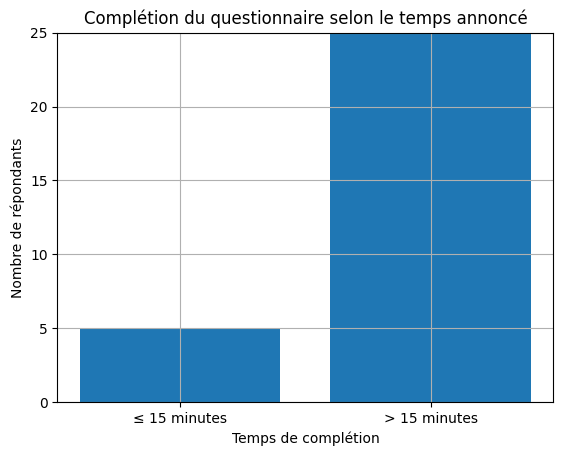

In [131]:
import matplotlib.pyplot as plt

# Filtrer les répondants ayant terminé
finished = df[df['Finished'] == True]

# Ceux qui terminent dans le temps annoncé
avant_15 = finished[finished['Duration_min'] <= 15]

labels = ['≤ 15 minutes', '> 15 minutes']
values = [len(avant_15), len(finished) - len(avant_15)]

plt.figure()
plt.bar(labels, values)
plt.ylim(0, 25)
plt.title("Complétion du questionnaire selon le temps annoncé")
plt.ylabel("Nombre de répondants")
plt.xlabel("Temps de complétion")
plt.grid()
plt.show()


In [132]:
values

[5, 26]

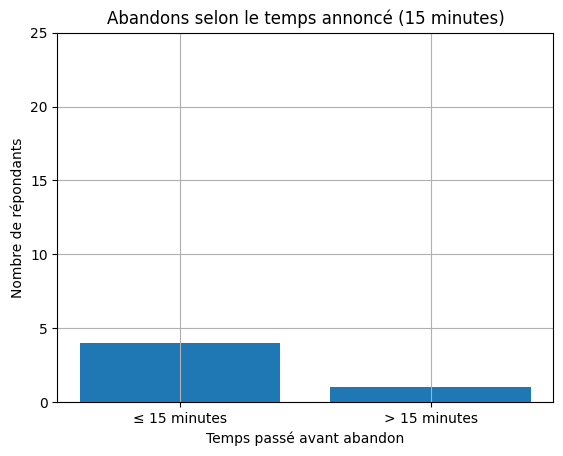

In [141]:
# Répondants n'ayant pas terminé
not_finished = df[df['Finished'] == False]

# Comptages
avant_15_nf = len(not_finished[not_finished['Duration_min'] <= 15])
apres_15_nf = len(not_finished[not_finished['Duration_min'] > 15])

labels = ['≤ 15 minutes', '> 15 minutes']
values = [avant_15_nf, apres_15_nf]


plt.figure()
plt.bar(labels, values)
plt.ylim(0, 25)
plt.xlabel("Temps passé avant abandon")
plt.ylabel("Nombre de répondants")
plt.title("Abandons selon le temps annoncé (15 minutes)")
plt.grid()
plt.show()

In [134]:
values

[4, 1]

In [145]:
# 
not_finished = df[df['Finished'] == False]
# 
avant_15_nf = not_finished[not_finished['Duration_min'] <= 15]
# Pourcentage
pct_avant_15_nf = len(avant_15_nf) / len(not_finished) * 100
print(pct_avant_15_nf)
print(len(avant_15_nf), len(not_finished))

80.0
4 5
